# This notebook will be used to create all the graphs for the report

In [13]:
# imports
import pandas as pd
from river_class import river_obj
from undershot_calcs import underTurbine
from breastshot_calcs import breastTurbine
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# import test data
data_df = pd.read_csv('Test Data/testData.csv')
data_df


,Position,x centre [m],y centre [m],Output power [kW],Period for 10 rotation [s],Period for 1 rotation [s],Turbine rotational speed [rev/s],Turbine rotational speed [RPM],Generator rotational speed [RPM]
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6
5,F,0.88,-0.13,0.505,37.15,3.715,0.269,16.2,258.4
6,G,0.98,-0.45,0.638,34.54,3.454,0.290,17.4,277.9
7,H,1.12,-0.50,0.768,28.60,2.860,0.350,21.0,335.7
8,I,1.24,-0.54,0.772,28.71,2.871,0.348,20.9,334.4
9,J,0.89,-0.18,0.548,35.97,3.597,0.278,16.7,266.9


In [15]:
'''
To validate the data i will first run the horizontal, 
vertical offset and turbine rot speed as inputs and compare for error on output power

Water height in channel = 0.3m
Channel width = 0.77m
Approx. 1.5 m/s

turbine dims:
radius = 0.585m
width = 1.008m
number of blades = 6

'''

# create river object
r_width = 0.77
r_depth = 0.3
r_velocity = 1.5

river = river_obj(r_width, r_depth, r_velocity, head=2)

# create a breastshot turbine object - with values from data sheet
breast_turbine = breastTurbine(river)




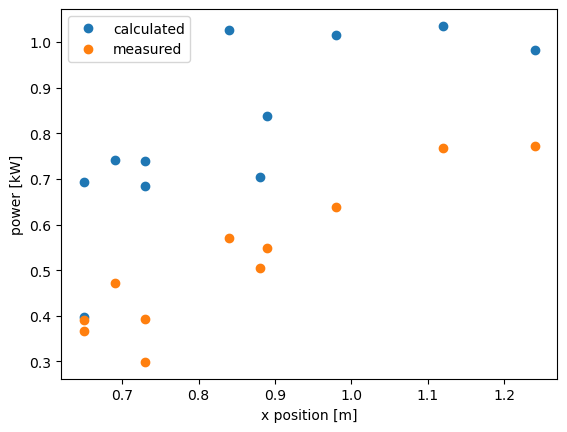

In [16]:


# loop through df and create a turbine object for each row
power_list = []
for index, row in data_df.iterrows():
    breast_turbine.__init__(river,x_centre=row['x centre [m]'], y_centre=row['y centre [m]'], RPM=row['Turbine rotational speed [RPM]'])
    power_list.append(breast_turbine.analysis(x=row['x centre [m]'], y=row['y centre [m]'], RPM=row['Turbine rotational speed [RPM]']) / 1000)


# add power list to df
data_df['power [W]'] = power_list 

# plot power vs x position
plt.figure()
plt.plot(data_df['x centre [m]'], data_df['power [W]'], 'o', label='calculated')
plt.plot(data_df['x centre [m]'], data_df['Output power [kW]'], 'o', label='measured')
plt.xlabel('x position [m]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()


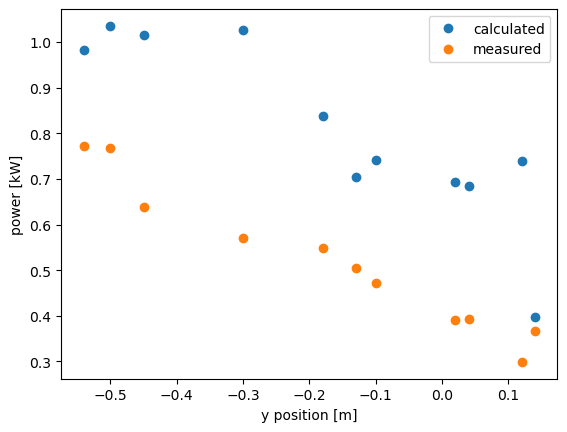

In [17]:
# plot power vs y position
plt.figure()
plt.plot(data_df['y centre [m]'], data_df['power [W]'] , 'o', label='calculated')
plt.plot(data_df['y centre [m]'], data_df['Output power [kW]'], 'o' , label='measured')
plt.xlabel('y position [m]')
plt.ylabel('power [kW]')
plt.legend()
plt.show()


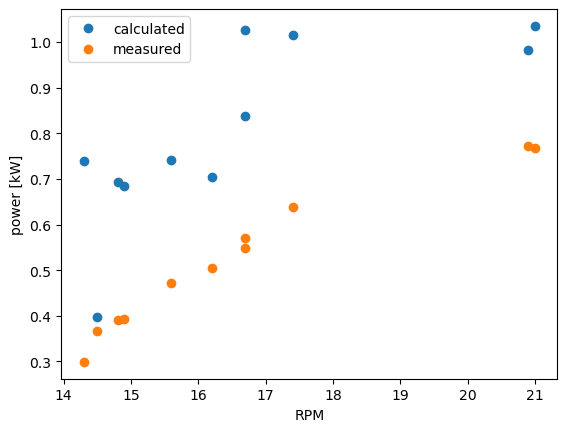

In [18]:
# plot power vs RPM

plt.figure()
plt.plot(data_df['Turbine rotational speed [RPM]'], data_df['power [W]'] , 'o', label='calculated')
plt.plot(data_df['Turbine rotational speed [RPM]'], data_df['Output power [kW]'], 'o', label='measured')
plt.xlabel('RPM')
plt.ylabel('power [kW]')
plt.legend()

plt.show()


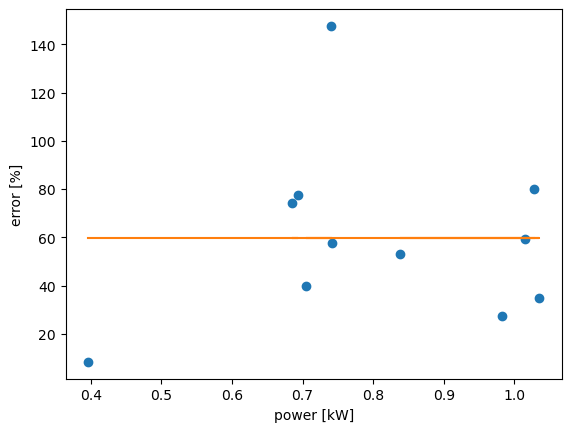

In [23]:
# calculate the error
error = np.abs(data_df['power [W]'] - data_df['Output power [kW]']) / data_df['Output power [kW]'] * 100

# plot the power vs error
plt.figure()
plt.plot(data_df['power [W]'], error, 'o')

# and a line of average error
plt.plot(data_df['power [W]'], np.ones(len(data_df['power [W]'])) * np.mean(error))
plt.xlabel('power [kW]')
plt.ylabel('error [%]')
plt.show()



